In [1]:
from wqu.dp import BinomialTree


bt_put_am = BinomialTree(S0=50, K=52, T=2, r=0.05, u=1.2, d=0.8, N=2, option_type='put', option_style='american')
bt_put_am.build_stock_tree()
bt_put_am.build_option_tree()
bt_put_am.summary()

bt_put_am.price()

Option Type: Put
Price at t=0: 5.0896
Risk-neutral p: 0.6282
Discount factor: 0.9512


np.float64(5.089632474198373)

In [2]:
bt_call_am = BinomialTree(S0=50, K=52, T=2, r=0.05, u=1.2, d=0.8, N=2, option_type='call', option_style='american')
bt_call_am.summary()

bt_call_am.price()

Option Type: Call
Price at t=0: 7.1411
Risk-neutral p: 0.6282
Discount factor: 0.9512


np.float64(7.141108542733969)

In [3]:
bt_call_am.check_put_call_parity(verbose=True)

Put-Call Parity Check:
P0 = 4.1927
C0 = 7.1411
PV of K = K*e^(-rT) = 47.0515
Call + K*e^(-rT) = 54.1927
Put + S0        = 54.1927
Difference       = 0.000000


True

In [4]:
# american_option(45, 100, 5, 0, 1.5, 1 / 1.5, 5, "C")
bt_call_am2 = BinomialTree(S0=45, K=100, T=5, r=0, u=1.5, d=1/1.5, N=5, option_type='call', option_style='american')

In [5]:
bt_call_am2.price()
bt_call_am2.summary()

Option Type: Call
Price at t=0: 6.4592
Risk-neutral p: 0.4000
Discount factor: 1.0000


In [6]:
bt_call_am2.build_delta_tree()

array([[0.34208   , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.1328    , 0.4816    , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.22133333, 0.65511111, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.36888889, 0.84592593, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.61481481, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

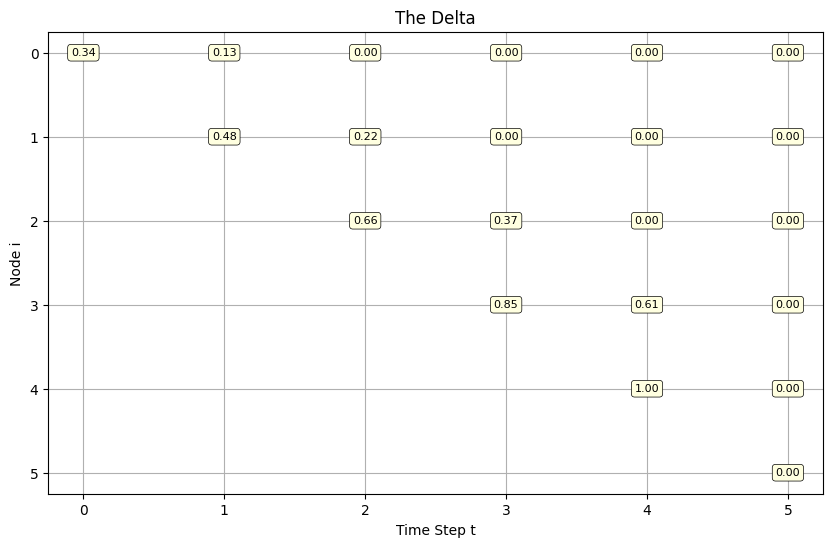

In [7]:
bt_call_am2.plot_tree(tree=bt_call_am2.build_delta_tree(),title="The Delta")

In [8]:
bt_am_put = BinomialTree(S0=50, K=52, T=2, r=0.05, u=1.2, d=0.8, N=2, option_type='put', option_style='american')
bt_am_put.build_stock_tree()
bt_am_put.build_option_tree()
bt_am_put.build_delta_tree()

# Simulate dynamic hedge for path: up then down
bt_am_put.simulate_delta_hedge(path='ud')

Initial Hedge:
Stock: 50.00, Delta: -0.53, Shares: -0.53, Cash: 26.46, Total: 0.00

Step | Stock  | Delta  | Shares Δ | Stock Value | Cash | Total
 1    | 60.00   | -0.17  | 0.36     | -10.00      | 8.33   | -1.67
 2    | 48.00   | 0.00   | 0.17     | 0.00        | -1.67  | -1.67

Final Results:
  Hedged Portfolio Value : -1.6667
  Option Payoff          : 4.0000
  Hedging Error          : -5.6667


(np.float64(-1.6666666666666679),
 np.float64(4.0),
 np.float64(-5.666666666666668))

In [12]:
# european_option(
    50, 52, 5, 0.05, 1.2, 0.8, 5, "C"
)

Initial Hedge:
Stock: 50.00, Delta: -0.49, Shares: -0.49, Cash: 24.52, Total: 0.00

Step | Stock  | Delta  | Shares Δ | Stock Value | Cash | Total
 1    | 60.00   | -0.23  | 0.26     | -13.66      | 11.38  | -2.28
 2    | 48.00   | -0.71  | -0.48    | -34.00      | 40.22  | 6.22
 3    | 57.60   | 0.00   | 0.71     | 0.00        | 6.22   | 6.22

Final Results:
  Hedged Portfolio Value : 6.2240
  Option Payoff          : 0.0000
  Hedging Error          : 6.2240


(np.float64(6.223992958472564), 0, np.float64(6.223992958472564))

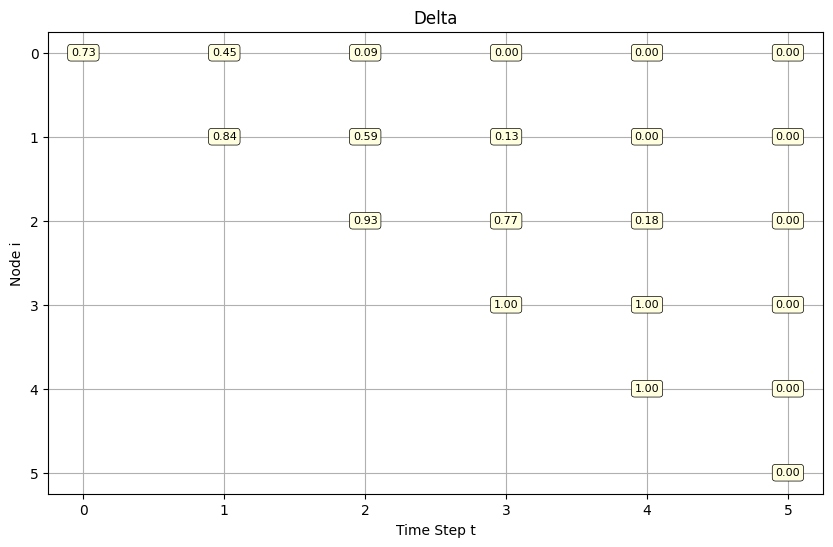

In [16]:
bt_eu_call = BinomialTree(
    S0=50,
    K=52,
    T=5,
    r=0.05,
    u=1.2,
    d=0.8,
    N=5
)
bt_eu_call.price()

dtree = bt_eu_call.build_delta_tree()

bt_eu_call.plot_tree(tree=dtree, title="Delta")